# 0. Imports
Pas in deze cel de variabele **git_dir** aan naar de map met code

In [1]:
import os
import sys
import numpy as np
%load_ext autoreload
%autoreload 2

git_dir = r"D:\Work\git\GIS_tools"
sys.path.append(os.path.join(git_dir, 'Code'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox/Readers'))

from notebooks.background_scripting.v1.test_connection import TestConnection
test_connection = TestConnection()

Imports are succesfull!


# 1. Model specifications 
In deze stap wordt het model geselecteerd en geconfigureerd

## 1.1. Select basemodel
In path to folder with models staat de map waar de modellen zich bevinden. Door vervolgens op update settings te klikken kan een model geselecteerd worden. Eindig altijd door (wederom) op update settings te klikken

In [2]:
from notebooks.background_scripting.v1.select_basemodel import ModelSettings

model_settings = ModelSettings()
model_settings.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Model settings are:'

{
    "folder": "D:\\Work\\Project\\P1414\\Models\\Combined",
    "model": "V20_WBD_v1_simulated",
    "scenario_name": "run"
}


## 1.2. Model settings
Vul in dit blok de start en eindtijd van het model in, evenals het interval voor _map.nc bestanden en de D-HYDRO versie

In [3]:
import shutil
from notebooks.background_scripting.v1.modify_mdu import ModifyMDU, copy_model

model_path = copy_model(os.path.join(model_settings.settings['folder'], model_settings.settings['model']), model_settings.settings['scenario_name'])
modify_mdu = ModifyMDU(model_path)
modify_mdu.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'MDU settings are:'

{
    "tStart": 0.0,
    "tStop": 168.0,
    "mapInterval": 20.0,
    "DHYDRO location": "C:\\Program Files\\Deltares\\D-HYDRO Suite 2023.01 1D2D\\plugins\\DeltaShell.Dimr\\kernels\\x64\\dimr\\scripts\\run_dimr.bat"
}


## 1.3. Dambreak location
Selecteer de dambreak locatie in de volgende stappen

In [8]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import DambreakWidget

dambreakWidget = DambreakWidget(model_path)
dambreakWidget.draw_map()

Map(center=[51.970682, 4.64013599], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

HTML(value='<b style="color:black;font-size:18px;">Step 1: Select dambreach location (1/4) </b>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x03\x84\x08\x03\x00\x00\x00\x8c\xe6\…

Button(description='Next step', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#35…

Output()

## 1.4. Dambreak settings
Bepaal de initiële hoogte van de dambreak (in m+NAP) 

In [5]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import ModifyDambreak

add_dambreak = ModifyDambreak(model_path, dambreakWidget.settings, dambreakWidget.keringen)
add_dambreak.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Dambreak settings are:'

{
    "crestLevelIni": 3.0,
    "t0": 0.0,
    "timeToBreachToMaximumDepth": 360.0,
    "crestLevelMin": -2.0,
    "breachWidthIni": 5.0,
    "f1": 1.3,
    "f2": 0.04,
    "uCrit": 0.2
}


## 1.5. Boundary conditions
Specificeer de randvoorwaarden

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Boundary conditions are:'

{
    "Waterlevel North Sea": 0.0,
    "Waterlevel Markermeer": 0.0,
    "Rhine basic discharge": 5000.0,
    "Rhine peak discharge": 16000.0,
    "Rhine event start": 0.0,
    "Rhine event duration": 600000.0
}


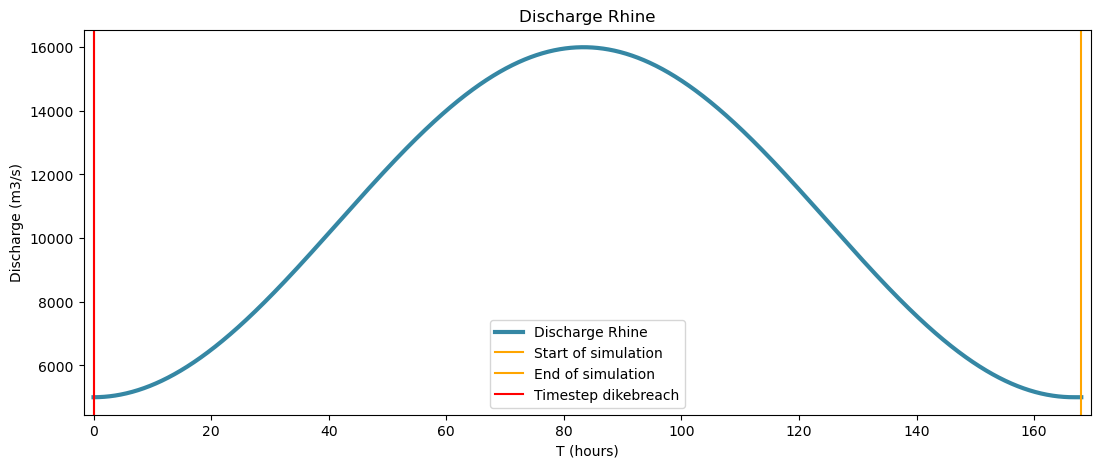

In [6]:
from notebooks.background_scripting.v1.modify_boundaries import ModifyBoundaries, ModifyRhineDischarge

modify_boundaries = ModifyBoundaries(model_path, modify_mdu.settings, add_dambreak.dambreak_settings)
modify_boundaries.display_widgets()

# 2. Run Model
Simuleer het scenario

In [7]:
from notebooks.background_scripting.v1.model_runner import ModelRunner

model_runner = ModelRunner(model_path)
model_runner.display_widgets()

Button(description='Run model!', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#3…

Output()

Exception: Dambreak is invalid, retry setting a dambreak

# 3. Post processing

## 3.1. Plot map
Visualiseer de resultaten op een kaart

In [9]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsMap, MapPlotter

output_path = os.path.join(model_path, 'dflowfm\output')
plot_settings = PlotSettingsMap(output_path)
plot_settings.display_widgets()

Button(description='Plot map', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#358…

Output()

## 3.2. Plot dambreak
Visualiseer de resultaten van de dambreak in grafieken

In [10]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsBreach, BreachPlotter


output_path = os.path.join(model_path, 'dflowfm\output')
plot_settings = PlotSettingsBreach(output_path)
plot_settings.display_widgets()



Button(description='Plot breach information', layout=Layout(height='35px', width='99%'), style=ButtonStyle(but…

Output()